In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('ola_driver_scaler.csv')

In [3]:
df.head()

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


#### Dropping Unnamed:0

In [4]:
df = df.iloc[:,1:]

In [5]:
df.head()

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [6]:
df.shape

(19104, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Driver_ID,19104.0,1415.591133,8.107053e+02,1.0,710.0,1417.0,2137.0,2788.0
Age,19043.0,34.668435,6.257912e+00,21.0,30.0,34.0,39.0,58.0
Gender,19052.0,0.418749,4.933670e-01,0.0,0.0,0.0,1.0,1.0
Education_Level,19104.0,1.021671,8.001671e-01,0.0,0.0,1.0,2.0,2.0
Income,19104.0,65652.025126,3.091452e+04,10747.0,42383.0,60087.0,83969.0,188418.0
Joining Designation,19104.0,1.690536,8.369837e-01,1.0,1.0,1.0,2.0,5.0
Grade,19104.0,2.252670,1.026512e+00,1.0,1.0,2.0,3.0,5.0
Total Business Value,19104.0,571662.074958,1.128312e+06,-6000000.0,0.0,250000.0,699700.0,33747720.0
Quarterly Rating,19104.0,2.008899,1.009832e+00,1.0,1.0,2.0,3.0,4.0


#### Checking for Null Values

In [9]:
df.isnull().sum()

MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

### Imputing Null Values with KNN Imputer

In [10]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)


imputer.fit(df[['Age', 'Gender']])


imputed_values = imputer.transform(df[['Age', 'Gender']])

df[['Age', 'Gender']] = imputed_values

df.isnull().sum()

MMM-YY                      0
Driver_ID                   0
Age                         0
Gender                      0
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

### Feature Engineering: Creating Flag Columns

In [11]:
df['Rating_Increase_Flag'] = df.groupby('Driver_ID')['Quarterly Rating'].diff().gt(0).astype(int)

df['Income_Increase_Flag'] = df.groupby('Driver_ID')['Income'].diff().gt(0).astype(int)

df['Still_At_Company_Flag'] = df['LastWorkingDate'].isnull().astype(int)


In [12]:
df.head()

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Rating_Increase_Flag,Income_Increase_Flag,Still_At_Company_Flag
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2,0,0,1
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2,0,0,1
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2,0,0,0
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1,0,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1,0,0,1


In [13]:
columns_to_convert = ['Driver_ID', 'Gender', 'City', 'Education_Level', 'Joining Designation', 'Grade', 'Quarterly Rating']
df[columns_to_convert] = df[columns_to_convert].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MMM-YY                 19104 non-null  object 
 1   Driver_ID              19104 non-null  object 
 2   Age                    19104 non-null  float64
 3   Gender                 19104 non-null  object 
 4   City                   19104 non-null  object 
 5   Education_Level        19104 non-null  object 
 6   Income                 19104 non-null  int64  
 7   Dateofjoining          19104 non-null  object 
 8   LastWorkingDate        1616 non-null   object 
 9   Joining Designation    19104 non-null  object 
 10  Grade                  19104 non-null  object 
 11  Total Business Value   19104 non-null  int64  
 12  Quarterly Rating       19104 non-null  object 
 13  Rating_Increase_Flag   19104 non-null  int64  
 14  Income_Increase_Flag   19104 non-null  int64  
 15  St

## Consolidating the Data with Group By on Driver_ID

In [14]:
date_cols = ['Dateofjoining', 'LastWorkingDate']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], dayfirst=True)

# Group by Driver_ID and aggregate the data
consolidated_data = df.groupby('Driver_ID').agg({
    'Age': 'first',
    'Gender': 'first',
    'City': 'first',
    'Education_Level': 'first',
    'Income': 'first',
    'Dateofjoining': 'min',
    'LastWorkingDate': 'max',
    'Joining Designation': 'first',
    'Grade': 'first',
    'Total Business Value': 'sum',
    'Quarterly Rating': 'mean',
    'Rating_Increase_Flag': 'max',
    'Income_Increase_Flag': 'max',
    'Still_At_Company_Flag': 'max'
}).reset_index()

<ipython-input-14-28664f28a638>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], dayfirst=True)
<ipython-input-14-28664f28a638>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], dayfirst=True)


In [15]:
consolidated_data

,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Rating_Increase_Flag,Income_Increase_Flag,Still_At_Company_Flag
0,1,28.0,0.0,C23,2,57387,2018-12-24,2019-11-03,1,1,1715580,2.0,0,0,1
1,2,31.0,0.0,C7,2,67016,2020-06-11,NaT,2,2,0,1.0,0,0,1
2,4,43.0,0.0,C13,2,65603,2019-07-12,2020-04-27,2,2,350000,1.0,0,0,1
3,5,29.0,0.0,C9,0,46368,2019-09-01,2019-07-03,1,1,120360,1.0,0,0,1
4,6,31.0,1.0,C11,1,78728,2020-07-31,NaT,3,3,1265000,1.6,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,33.0,0.0,C24,0,82815,2015-10-15,NaT,2,3,21748820,2.625,1,0,1
2377,2785,34.0,1.0,C9,0,12105,2020-08-28,2020-10-28,1,1,0,1.0,0,0,1
2378,2786,44.0,0.0,C19,0,35370,2018-07-31,2019-09-22,2,2,2815090,1.666667,0,0,1
2379,2787,28.0,1.0,C20,2,69498,2018-07-21,2019-06-20,1,1,977830,1.5,0,0,1


In [16]:
consolidated_data.isnull().sum()

Driver_ID                  0
Age                        0
Gender                     0
City                       0
Education_Level            0
Income                     0
Dateofjoining              0
LastWorkingDate          765
Joining Designation        0
Grade                      0
Total Business Value       0
Quarterly Rating           0
Rating_Increase_Flag       0
Income_Increase_Flag       0
Still_At_Company_Flag      0
dtype: int64

### Converting Datatypes

In [17]:
consolidated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Driver_ID              2381 non-null   int64         
 1   Age                    2381 non-null   float64       
 2   Gender                 2381 non-null   object        
 3   City                   2381 non-null   object        
 4   Education_Level        2381 non-null   object        
 5   Income                 2381 non-null   int64         
 6   Dateofjoining          2381 non-null   datetime64[ns]
 7   LastWorkingDate        1616 non-null   datetime64[ns]
 8   Joining Designation    2381 non-null   object        
 9   Grade                  2381 non-null   object        
 10  Total Business Value   2381 non-null   int64         
 11  Quarterly Rating       2381 non-null   object        
 12  Rating_Increase_Flag   2381 non-null   int64         
 13  Inc

In [18]:
consolidated_data[columns_to_convert] = consolidated_data[columns_to_convert].astype('object')
consolidated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Driver_ID              2381 non-null   object        
 1   Age                    2381 non-null   float64       
 2   Gender                 2381 non-null   object        
 3   City                   2381 non-null   object        
 4   Education_Level        2381 non-null   object        
 5   Income                 2381 non-null   int64         
 6   Dateofjoining          2381 non-null   datetime64[ns]
 7   LastWorkingDate        1616 non-null   datetime64[ns]
 8   Joining Designation    2381 non-null   object        
 9   Grade                  2381 non-null   object        
 10  Total Business Value   2381 non-null   int64         
 11  Quarterly Rating       2381 non-null   object        
 12  Rating_Increase_Flag   2381 non-null   int64         
 13  Inc

### Statistical Summary of the Data

In [19]:
consolidated_data.describe().T

,count,mean,min,25%,50%,75%,max,std
Age,2381.0,33.089038,21.0,29.0,33.0,37.0,58.0,5.839201
Income,2381.0,59209.060899,10747.0,39104.0,55276.0,75765.0,188418.0,28275.899087
Dateofjoining,2381,2019-01-27 12:58:58.009239808,2013-01-04 00:00:00,2018-06-26 00:00:00,2019-06-23 00:00:00,2020-04-14 00:00:00,2020-12-28 00:00:00,NaN
LastWorkingDate,1616,2019-12-26 23:22:34.455445760,2018-12-31 00:00:00,2019-06-10 00:00:00,2019-12-20 12:00:00,2020-07-14 00:00:00,2020-12-28 00:00:00,NaN
Total Business Value,2381.0,4586741.822764,-1385530.0,0.0,817680.0,4173650.0,95331060.0,9127115.313446
Rating_Increase_Flag,2381.0,0.345653,0.0,0.0,0.0,1.0,1.0,0.475681
Income_Increase_Flag,2381.0,0.01848,0.0,0.0,0.0,0.0,1.0,0.134706
Still_At_Company_Flag,2381.0,0.957161,0.0,1.0,1.0,1.0,1.0,0.202537


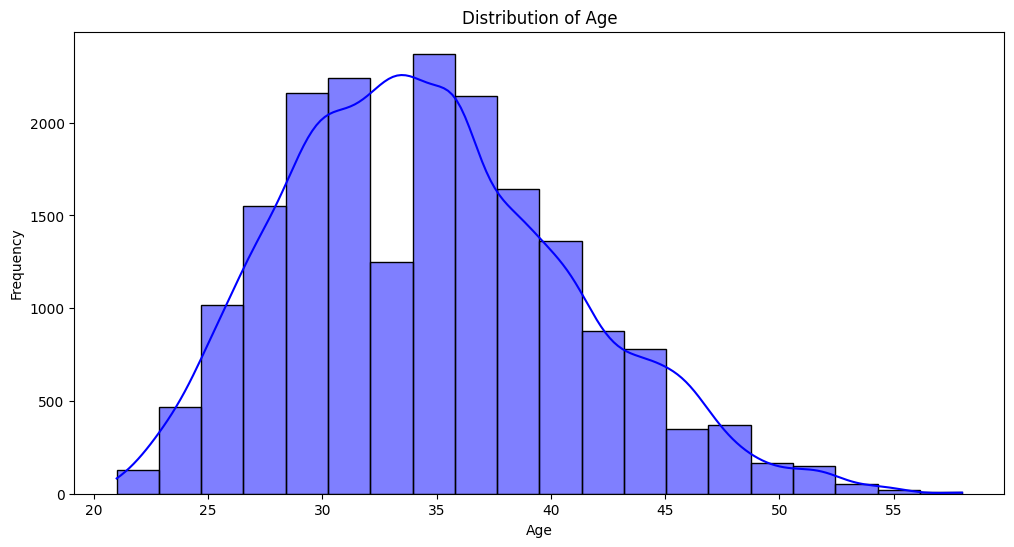

In [36]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], kde=True, color='blue', bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

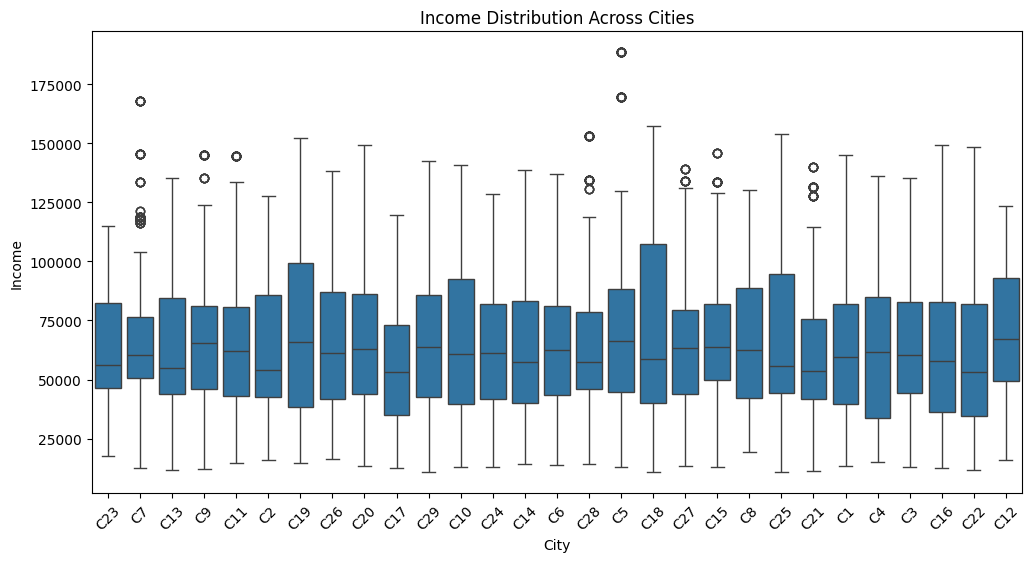

In [37]:
# Box plot for comparing numerical variables across categories
plt.figure(figsize=(12, 6))
sns.boxplot(x='City', y='Income', data=df)
plt.title('Income Distribution Across Cities')
plt.xlabel('City')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.show()

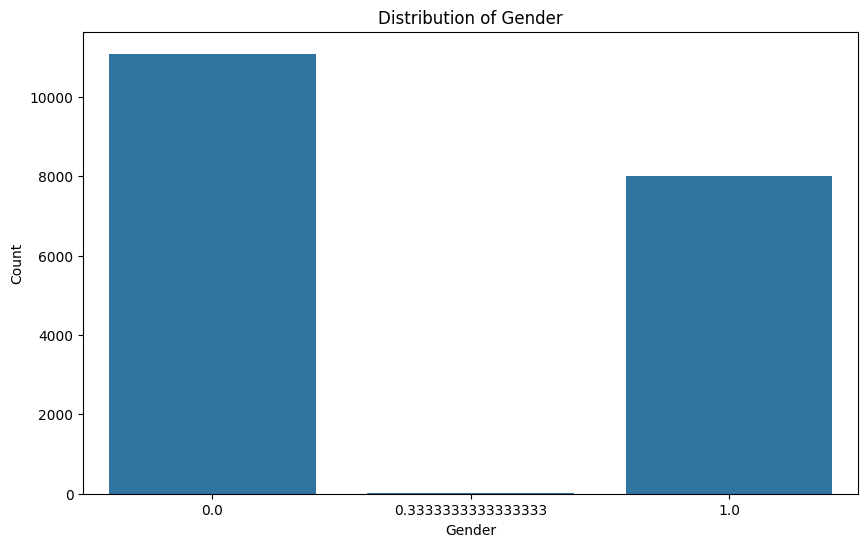

In [38]:
# Count plot for categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

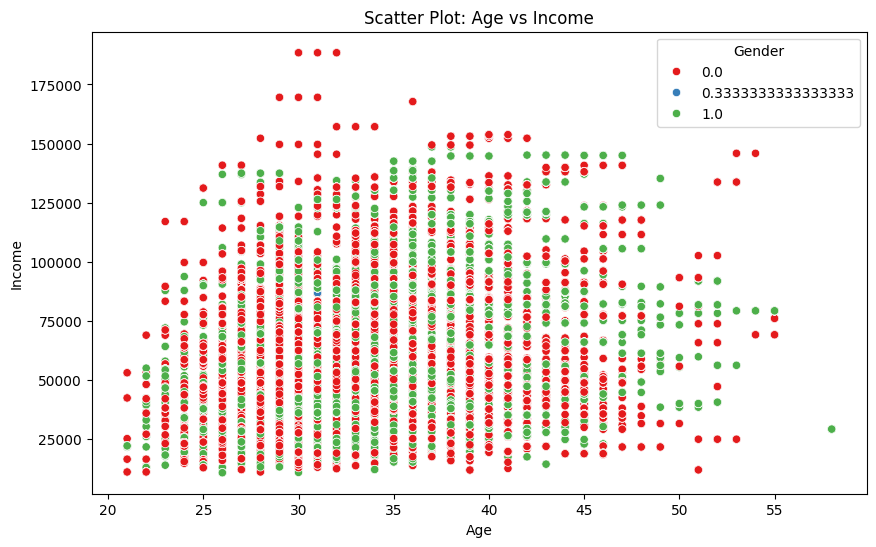

In [39]:
# Scatter plot for exploring relationships between numerical variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Income', data=df, hue='Gender', palette='Set1')
plt.title('Scatter Plot: Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

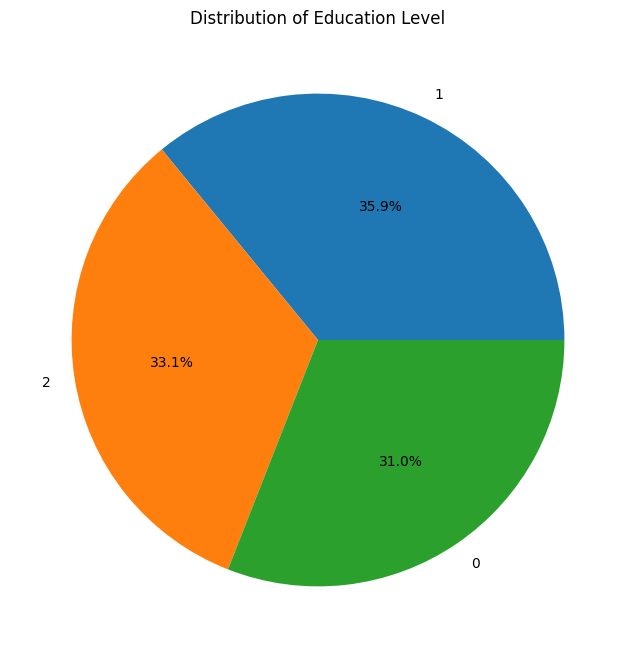

In [40]:
# Pie chart for visualizing the distribution of categories in a categorical variable
plt.figure(figsize=(8, 8))
df['Education_Level'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Education Level')
plt.ylabel('')
plt.show()

### Plotting Pearson Correlation Heatmap

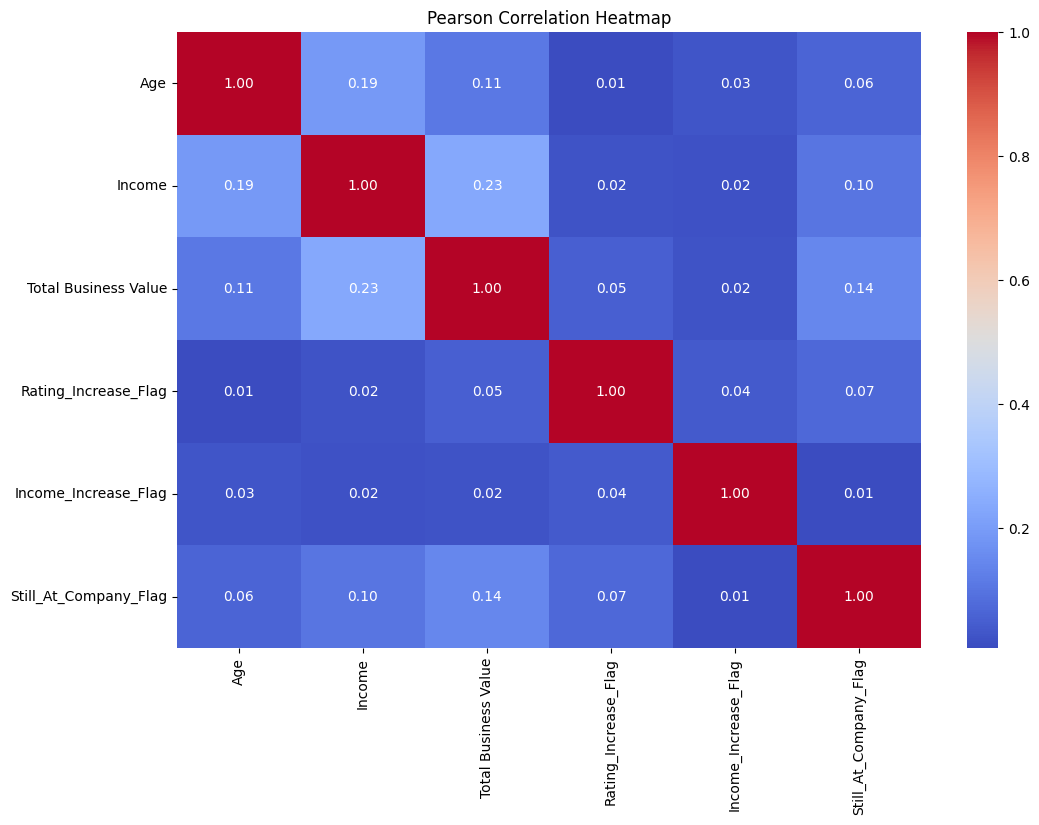

In [20]:
numeric_columns = df.select_dtypes(include=['number'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Heatmap')
plt.show()


### One Hot Encoding the Data

In [21]:
categorical_columns = ['Gender', 'City', 'Education_Level', 'Joining Designation', 'Grade']

one_hot_encoded = pd.get_dummies(consolidated_data, columns=categorical_columns)

one_hot_encoded

,Driver_ID,Age,Income,Dateofjoining,LastWorkingDate,Total Business Value,Quarterly Rating,Rating_Increase_Flag,Income_Increase_Flag,Still_At_Company_Flag,...,Joining Designation_1,Joining Designation_2,Joining Designation_3,Joining Designation_4,Joining Designation_5,Grade_1,Grade_2,Grade_3,Grade_4,Grade_5
0,1,28.0,57387,2018-12-24,2019-11-03,1715580,2.0,0,0,1,...,True,False,False,False,False,True,False,False,False,False
1,2,31.0,67016,2020-06-11,NaT,0,1.0,0,0,1,...,False,True,False,False,False,False,True,False,False,False
2,4,43.0,65603,2019-07-12,2020-04-27,350000,1.0,0,0,1,...,False,True,False,False,False,False,True,False,False,False
3,5,29.0,46368,2019-09-01,2019-07-03,120360,1.0,0,0,1,...,True,False,False,False,False,True,False,False,False,False
4,6,31.0,78728,2020-07-31,NaT,1265000,1.6,1,0,1,...,False,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,33.0,82815,2015-10-15,NaT,21748820,2.625,1,0,1,...,False,True,False,False,False,False,False,True,False,False
2377,2785,34.0,12105,2020-08-28,2020-10-28,0,1.0,0,0,1,...,True,False,False,False,False,True,False,False,False,False
2378,2786,44.0,35370,2018-07-31,2019-09-22,2815090,1.666667,0,0,1,...,False,True,False,False,False,False,True,False,False,False
2379,2787,28.0,69498,2018-07-21,2019-06-20,977830,1.5,0,0,1,...,True,False,False,False,False,True,False,False,False,False


### Dropping Date Columns

In [22]:
one_hot_encoded = one_hot_encoded.drop(columns = ['Driver_ID','Dateofjoining','LastWorkingDate'], axis = 1)

### Converting Bool Columns to Int

In [23]:
bool_columns = one_hot_encoded.select_dtypes(include=['bool']).columns
one_hot_encoded[bool_columns] = one_hot_encoded[bool_columns].astype(int)

In [24]:
one_hot_encoded.head(1)

,Age,Income,Total Business Value,Quarterly Rating,Rating_Increase_Flag,Income_Increase_Flag,Still_At_Company_Flag,Gender_0.0,Gender_0.3333333333333333,Gender_1.0,...,Joining Designation_1,Joining Designation_2,Joining Designation_3,Joining Designation_4,Joining Designation_5,Grade_1,Grade_2,Grade_3,Grade_4,Grade_5
0,28.0,57387,1715580,2.0,0,0,1,1,0,0,...,1,0,0,0,0,1,0,0,0,0


In [25]:
one_hot_encoded.isnull().sum().sum()

0

### Applying SMOTE and Train Test Split

In [26]:
X = one_hot_encoded.drop(columns=['Still_At_Company_Flag'], axis = 1)
y = one_hot_encoded['Still_At_Company_Flag']

In [27]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming your data is stored in a DataFrame called one_hot_encoded

# Separate features and target variable
X = one_hot_encoded.drop(columns=['Still_At_Company_Flag'], axis=1)
y = one_hot_encoded['Still_At_Company_Flag']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Shape of X_train_resampled:", X_train_resampled.shape)
print("Shape of y_train_resampled:", y_train_resampled.shape)

Shape of X_train_resampled: (3644, 51)
Shape of y_train_resampled: (3644,)


### Applying Standard Scaler

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Print the first few rows of the scaled training data
print("Scaled training data:")
print(X_train_scaled[:5])


Scaled training data:
[[-0.9622966   1.37328931 -0.34656093 -0.49994494 -0.47334032 -0.09988907
   1.01437332 -0.01656801 -0.62050359 -0.13156278  7.53931495 -0.1203188
  -0.13370525 -0.12264495 -0.12938729 -0.14789607 -0.13994963 -0.12379258
  -0.12828664 -0.1347646  -0.13994963 -0.19463028 -0.1347646  -0.14197456
  -0.1249303  -0.12605839 -0.1347646  -0.14789607 -0.13892696 -0.13156278
  -0.14982219 -0.14397323 -0.14982219 -0.13581627 -0.13047927 -0.12605839
  -0.14197456 -0.13263805  1.73586171 -0.53631382 -0.52484643 -0.84308844
  -0.5388583   2.71252616 -0.08799638 -0.05245749 -0.73938441 -0.54987165
   2.37434681 -0.17055154 -0.07239737]
 [ 0.13212331 -0.47960545 -0.28077377 -0.49994494 -0.47334032 -0.09988907
   1.01437332 -0.01656801 -0.62050359 -0.13156278 -0.13263805 -0.1203188
  -0.13370525 -0.12264495 -0.12938729 -0.14789607 -0.13994963 -0.12379258
  -0.12828664 -0.1347646  -0.13994963  5.13794669 -0.1347646  -0.14197456
  -0.1249303  -0.12605839 -0.1347646  -0.14789607 -0.

## Fitting Bagging Classifier with RandomForest as Base Learner

In [32]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a base classifier (you can use any classifier here)
base_classifier = RandomForestClassifier(random_state=42)

# Create a bagging classifier
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)

# Fit the bagging classifier on the training data
bagging_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the test data
y_pred_bag = bagging_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_bag)
print("Accuracy:", accuracy)


Accuracy: 0.9371069182389937


ROC AUC Score: 0.900765864332604


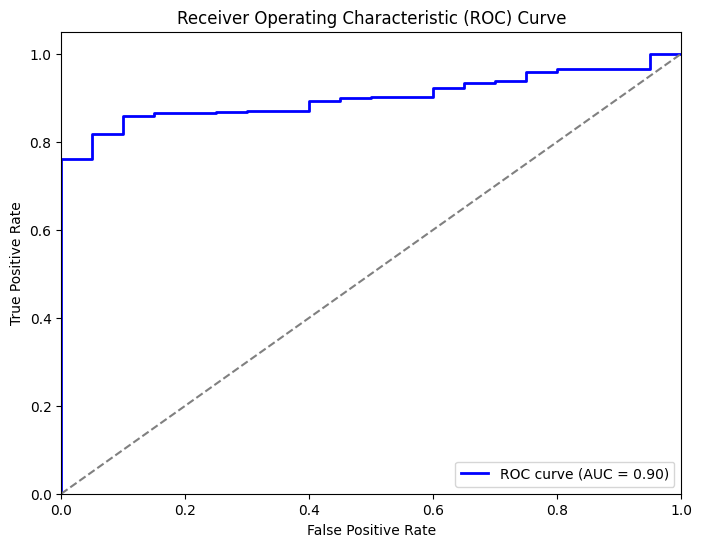

Classification Report:
              precision    recall  f1-score   support

           0       0.08      0.05      0.06        20
           1       0.96      0.98      0.97       457

    accuracy                           0.94       477
   macro avg       0.52      0.51      0.51       477
weighted avg       0.92      0.94      0.93       477

Confusion Matrix:
[[  1  19]
 [ 11 446]]


In [33]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Predict probabilities for the positive class
y_prob_bag = bagging_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_prob_bag)
print("ROC AUC Score:", roc_auc)

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_bag)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Generate classification report
y_pred_bag = bagging_classifier.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred_bag))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_bag)
print("Confusion Matrix:")
print(conf_matrix)


## Recommendations:

#### The ROC-AUC Curves of both the Algorithms reveal not much to choose between them. But the Classification Report suggests that Boosting Algortihm is more Balanced due the Presision and Recall scores of Class 0 Although the Bagging Algorithm has slightly more accuracy.

## Fitting a Gradient Boosting Algorithm

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

boosting_classifier = GradientBoostingClassifier(random_state=42)

# Fit the model on the training data
boosting_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the test data
y_pred = boosting_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9182389937106918


ROC AUC Score: 0.9004376367614879


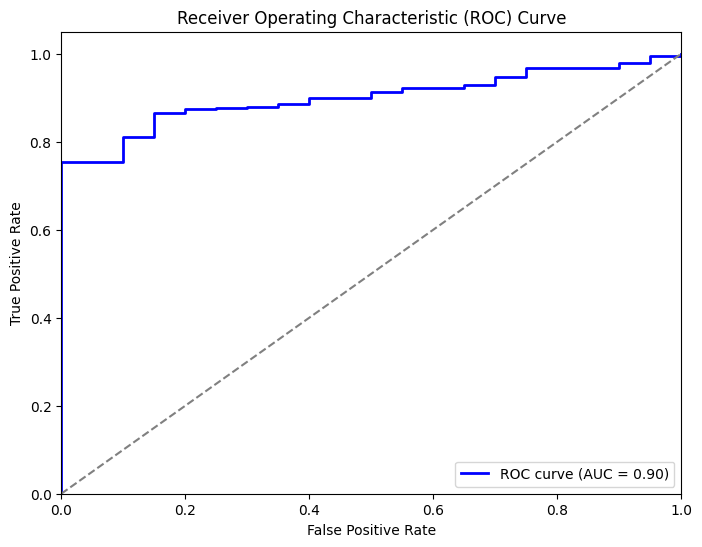

Classification Report:
              precision    recall  f1-score   support

           0       0.19      0.30      0.24        20
           1       0.97      0.95      0.96       457

    accuracy                           0.92       477
   macro avg       0.58      0.62      0.60       477
weighted avg       0.94      0.92      0.93       477

Confusion Matrix:
[[  6  14]
 [ 25 432]]


In [35]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix

# Predict probabilities for the positive class
y_prob = boosting_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", roc_auc)

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Generate classification report
y_pred = boosting_classifier.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
